In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, balanced_accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RandomizedSearchCV, RepeatedStratifiedKFold

In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
dataset = pd.read_csv("/media/kmdr7/Seagate/FP/PREPROCESSED/Dataset.csv").drop(['Detailed Label'], axis=1)

In [4]:
# dataset

In [5]:
X = dataset.drop(columns=["Label"])
y = dataset["Label"]

In [6]:
# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

target_features = 15 + 1
target_variance_threshold = 1

In [7]:
# Xx = pd.DataFrame(X.var())
# with pd.option_context('display.max_columns', None, 'display.max_rows', None, 'display.float_format', '{:2.4f}'.format):
#     print(Xx[Xx[0] > 1])
# Xx[Xx[0] < 1]

In [8]:
lv = VarianceThreshold(threshold=target_variance_threshold)
lv.fit_transform(X)
filtered_cols = X.drop(
    columns=X.columns[lv.get_support()].array
).columns.array
list(filtered_cols)

['Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'RST Flag Count',
 'CWR Flag Count',
 'ECE Flag Count',
 'Down/Up Ratio',
 'Fwd Bytes/Bulk Avg',
 'Fwd Packet/Bulk Avg',
 'Fwd Bulk Rate Avg']

In [9]:
newds = X.drop(columns=filtered_cols)
newds["Label"] = dataset["Label"]
cor = newds.corr()
cor_target = abs(cor["Label"])

del newds

In [10]:
# cor_target.sort_values(ascending=False)[cor_target > cor_target_value].index
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(cor_target.sort_values(ascending=False)[:target_features].index)

Index(['Label', 'FWD Init Win Bytes', 'Fwd Seg Size Min', 'Packet Length Mean',
       'Average Packet Size', 'Flow Duration', 'Packet Length Max',
       'Fwd IAT Total', 'Protocol', 'Fwd Packet Length Max', 'Bwd IAT Total',
       'Fwd Packet Length Mean', 'Fwd Segment Size Avg', 'Packet Length Std',
       'Bwd Segment Size Avg', 'Bwd Packet Length Mean'],
      dtype='object')


In [11]:
# relevant_features = cor_target[cor_target > cor_target_value]
relevant_features = cor_target.sort_values(ascending=False)[:target_features]
all_feature = set(X.columns)
relevant_features_idx = set(relevant_features.index)
removed_feature = list(all_feature - relevant_features_idx)

In [12]:
# X.drop(columns=removed_feature).columns
X.drop(columns=removed_feature, inplace=True)

In [13]:
X.columns

Index(['Protocol', 'Flow Duration', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Fwd IAT Total',
       'Bwd IAT Total', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Average Packet Size', 'Fwd Segment Size Avg',
       'Bwd Segment Size Avg', 'FWD Init Win Bytes', 'Fwd Seg Size Min'],
      dtype='object')

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457367 entries, 0 to 2457366
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Protocol                float64
 1   Flow Duration           float64
 2   Fwd Packet Length Max   float64
 3   Fwd Packet Length Mean  float64
 4   Bwd Packet Length Mean  float64
 5   Fwd IAT Total           float64
 6   Bwd IAT Total           float64
 7   Packet Length Max       float64
 8   Packet Length Mean      float64
 9   Packet Length Std       float64
 10  Average Packet Size     float64
 11  Fwd Segment Size Avg    float64
 12  Bwd Segment Size Avg    float64
 13  FWD Init Win Bytes      float64
 14  Fwd Seg Size Min        float64
dtypes: float64(15)
memory usage: 281.2 MB


In [15]:
X["Label"] = y

In [16]:
X.shape

(2457367, 16)

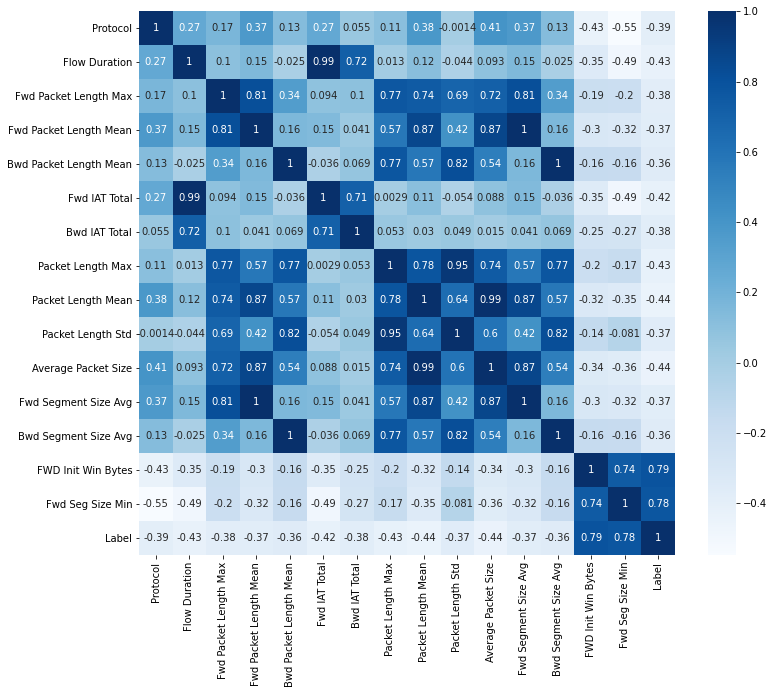

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True, cmap=plt.cm.Blues)
plt.savefig("/work/ta/FinalProject/FINAL PLAY/SS/Correlation/"+str(target_features-1)+"-FeaturesCorr.png")

In [18]:
# X.to_csv("/media/kmdr7/Seagate/TA/DATASETS/Preparation/Feature Importance/Dataset"+str(target_features)+".csv")